In [1]:
from IPython.display import display, HTML
from zlib import crc32
import pandas as pd
import numpy as np

In [2]:
def generate_task(code):
    rs = np.random.RandomState(code)
    tasks = pd.read_csv(
        'https://drive.google.com/uc?id=1g-AK3C74K-myj8zKbxk69zXO00roTKh-')

    type_to_id = dict()
    for i in range(len(tasks)):
        _type = tasks.loc[i]['code'].split('_')[0]
        if _type not in type_to_id:
            type_to_id[_type] = []
        type_to_id[_type].append(i)

    list_of_task_id = [rs.choice(type_to_id[_type]) for _type in type_to_id]

    return [{'task': tasks.loc[_loc]['task'],
             'data': tasks.loc[_loc]['data']} 
            for _loc in list_of_task_id]

In [3]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
task['tasks'] = generate_task(task['id'])

task

Enter your mail: puchkov.k@phystech.edu


{'id': 3366284282,
 'mail': 'puchkov.k@phystech.edu',
 'tasks': [{'data': '1F_FUZ7iUBKeMOhoMhvqjc5Nl7K4g5iE7',
   'task': 'Рассмотрим выборку зависимости числа поломок телефонов (среди всех тестовых образцов, в выборке указано сломался телефон или нет) для пары брендов телефонов (brand-1; brand-2) среди дешевых и дорогих телефонов (high price; low price). Есть ли связь между поломками и ценовым сегментом. Есть ли замечания по данным?'},
  {'data': '1-6J8Jd6yG4ztDL32SIH99rNH4CK9hKw5',
   'task': 'Задана выборка курса обмена иностранной валюты в зависимости от двух переменных: ВВП страны и популярности зеленых гавайских галстуков. Определить, значимы ли эти признаки и их межфакторное взаимодействие для  построения линейное регрессии.'},
  {'data': '1p7gTT3ZfmTIwJg1Tfd8Nflojy1alsfks=',
   'task': 'Рассмотрим задачу аппроксимации уровня продаж мандарин за последние 10 лет. Постройте модель, которая аппроксимирует данный временной ряд при помощи ARIMA. Подберите оптимальные параметры.'}]}

# Задача №1

In [47]:
task_numder = 1
if task['tasks'][task_numder-1]['data'] != '-':
    dataset1 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset1 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [48]:
dataset1.head(5)

,price,brand,is_broken
0,high,1,yes
1,high,1,yes
2,high,1,yes
3,high,1,yes
4,high,1,yes


In [56]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('is_broken ~ price * brand',  data=dataset1).fit()
table = sm.stats.anova_lm(lm, typ=1)
table.round(3)

ValueError: ignored

для первого бренда: R = 0.0101; p-value = 0.647
для второго бренда: R = 0.00846; p-value = 0.7
для первого бренда: Corr = 0.0101; p-value = 0.647
для второго бренда: Corr = 0.00846; p-value = 0.7


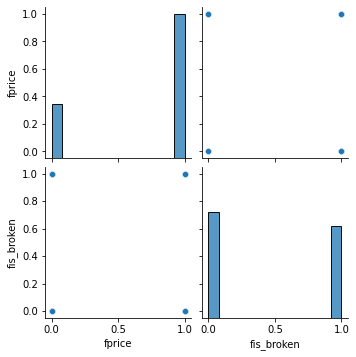

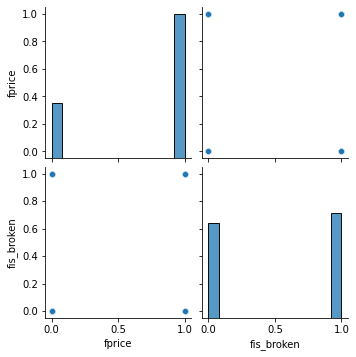

In [88]:

import seaborn as sns

d1 = {'high':1, 'low':0}
d2 = {'yes':1, 'no':0}

dataset1[['fprice', 'fis_broken']] = dataset1.apply(lambda x: [d1[x['price']], d2[x['is_broken']]], axis=1, result_type='expand')

data1 = dataset1.loc[dataset1.brand == 1][['fprice', 'fis_broken']]
data2 = dataset1.loc[dataset1.brand == 2][['fprice', 'fis_broken']]

sns.pairplot(data1)

sns.pairplot(data2)

# линейная взаимосвязь между столбцами выборки по t-критерию Стьюдента
r, pvalue = st.pearsonr(data1['fprice'], data1['fis_broken'])
print(f'для первого бренда: R = {r:0.3}; p-value = {pvalue:0.3}')
r, pvalue = st.pearsonr(data2['fprice'], data2['fis_broken'])
print(f'для второго бренда: R = {r:0.3}; p-value = {pvalue:0.3}')

# Коэффициент корреляции Кендалла
corr, pvalue = st.kendalltau(data1['fprice'], data1['fis_broken'])
print(f'для первого бренда: Corr = {corr:.3}; p-value = {pvalue:.3}')
corr, pvalue = st.kendalltau(data2['fprice'], data2['fis_broken'])
print(f'для второго бренда: Corr = {corr:.3}; p-value = {pvalue:.3}')

Корреляция присутствует.

# Задача №2

In [73]:
task_numder = 2
if task['tasks'][task_numder-1]['data'] != '-':
    dataset2 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset2 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [74]:
dataset2.sample(5)

,# money,gdp,tie
33,775.4200,861.5700,149.0
7,7.6483,8.4979,615.0
79,500.0600,555.6100,595.0
95,630.1700,700.1900,10.0
58,295.9200,328.8000,93.0


In [75]:
dataset2.columns = ["money", "gdp", "tie"]
X = dataset2.drop('money', axis=1)
y = dataset2['money']
X

,gdp,tie
0,441.28,550.0
1,734.21,836.0
2,555.99,879.0
3,845.78,632.0
4,909.28,563.0
...,...,...
95,700.19,10.0
96,330.24,639.0
97,917.68,120.0
98,197.85,414.0


In [80]:
import statsmodels.api as sm

model2 = sm.OLS.from_formula("money ~ gdp*tie", data=dataset2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  money   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.796e+11
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:44:59   Log-Likelihood:                 418.83
No. Observations:                 100   AIC:                            -829.7
Df Residuals:                      96   BIC:                            -819.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0014      0.001     -1.158      0.250      -0.004       0.001
gdp            0.9000   2.19e-06   4.11e+05      0.000       0.900       0.900
tie         2.972e-06   2.37e-06      1.257      0.212   -1.72e-06    7.67e-06
gdp:tie     4.607e-08   4.11e-09     11.215      0.000    3.79e-08    5.42e-08
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.607
Skew:                          -0.127   Prob(JB):                        0.738
Kurtosis:                       2.716   Cond. No.                     1.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значит, галстуки неважны, остальное все важно.

# Задача №3

In [81]:
task_numder = 3
if task['tasks'][task_numder-1]['data'] != '-':
    dataset3 = pd.read_csv(
        'https://drive.google.com/uc?id={}'.format(
            task['tasks'][task_numder-1]['data']))
    print('dataset loaded')
else:
    dataset3 = pd.DataFrame(['not', 'required'])
    print('dataset is not required')
display(HTML('<h3>'+task['tasks'][task_numder-1]['task']+'</h3>'))

dataset loaded


## Решение задачи

In [82]:
dataset3.sample(3)

,t,point
68,9.2015,7.691114
85,2.2017,11.873188
74,3.2016,11.943547


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


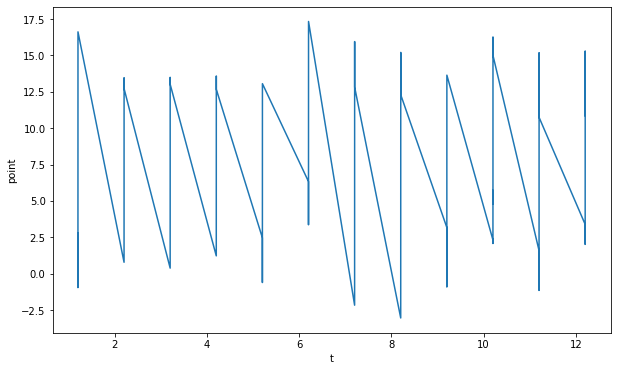

In [94]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
import scipy.stats as st

plt.figure(figsize = (10,6))
sns.lineplot(dataset3['t'],dataset3['point'])
plt.show()

In [95]:
data = dataset3.set_index(pd.DatetimeIndex(dataset3['t']))
stl_data = seasonal_decompose(dataset3['point'])
stl_data.plot()

AttributeError: ignored

In [89]:
for i in range(-1,2):
    for k in range(-1, 2):
        order = (3+i,1,1+k)
        try:
            arima = ARIMA(dataset3['point'].values, order=order).fit()
            print(arima.summary())
        except:
            pass